                                                                        OPEN CV 

                                                                        READING

IMAGE READING 

In [1]:
import cv2 as cv 
import numpy as np  
import matplotlib.pyplot as plt 
from matplotlib.pylab import rcParams 
rcParams['figure.figsize'] = 20,8

In [ ]:
img = cv.imread('photos/Blue Bmw.jpg')
cv.imshow('Blue Bmw', img)
cv.waitKey(0)   

VIDEO READING

In [ ]:
capture = cv.VideoCapture('videos/Lion.mp4')
while True:
    isTrue, frame = capture.read()
    cv.imshow('videos',frame)
    
    if cv.waitKey(20) & 0xFF == ord('d'):
        break

capture.release() 
cv.destroyAllWindows() 
        

                                                                        RESIZING

In [ ]:
def changeRes(width,height): #change for live video
    capture.set(3,width)
    capture.set(4,height)

In [18]:
def rescale(frame , scale = 60): #change in original video
    width = int(frame.shape[1]*scale)
    height = int(frame.shape[0]*scale)
    dimensions = (width,height)
    return cv.resize(frame,dimensions,interpolation=cv.INTER_AREA)
 



for image

In [ ]:
img = cv.imread('photos/Blue Bmw.jpg')
cv.imshow('Blue Bmw', rescale(img))
cv.waitKey(0)   

for video

In [ ]:
capture = cv.VideoCapture('videos/Lion.mp4')
while True:
    isTrue, frame = capture.read()
    
    frame_resized = rescale(frame) #resized function
    cv.imshow('lion video resized',frame_resized)


    if cv.waitKey(20) & 0xFF == ord('d'):
        break

capture.release()
cv.destroyAllWindows()

                                                               how to draw in image

In [ ]:
blank  = np.zeros((500,500,3),dtype='uint8')  # blank image
cv.imshow('blank',blank) 
cv.waitKey(0) 

In [ ]:
blank  = np.zeros((500,500,3),dtype='uint8')  # blank image
blank[:] = 0,255,0
cv.imshow('green',blank) 
cv.waitKey(0) 

In [ ]:
blank  = np.zeros((500,500,3),dtype='uint8')  # blank image
blank[:] = 0,0,255
cv.imshow('red',blank) 
cv.waitKey(0) 

make a red block 

In [ ]:
blank  = np.zeros((500,500,3),dtype='uint8')  # blank image
blank[200:300, 300:400] = 0,0,255
cv.imshow('red',blank) 
cv.waitKey(0) 

RECTANGLE

In [ ]:
blank  = np.zeros((500,500,3),dtype='uint8')  # blank image
cv.rectangle(blank, (50,50), (300,250), (0,255,0), thickness=-1) #image vaiable , starting point, length, breadth, thickness
cv.imshow('rectangle',blank) #-1 fills rectange other values dont
cv.waitKey(0) 

CIRCLE

note-                                                                             
lenght = variable.shape[1]                                                        
breadth = variable.shape[0]

In [ ]:
blank  = np.zeros((500,500,3),dtype='uint8')  # blank image
cv.circle(blank, (250,250), (100), (0,255,0), thickness = 5) #var,centre,radius,color,thick
cv.imshow('circle',blank) #-1 fills rectange other values dont
cv.waitKey(0)  

LINE

In [ ]:
blank  = np.zeros((500,500,3),dtype='uint8')  # blank image
cv.line(blank, (50,50), (250,250), (0,0,250) ,thickness = 3) #var,staring point,end point,color,thick
cv.imshow('line',blank) #-1 fills rectange other values dont
cv.waitKey(0)  

TEXT

In [ ]:
blank  = np.zeros((500,500,3),dtype='uint8')  # blank image
cv.putText(blank, 'HI I learn OPENCV today!', (0,250), cv.FONT_HERSHEY_COMPLEX, 1.0,(0,255,0), 2) #var,text,where,font,font thickness,color,thick
cv.imshow('text',blank) #-1 fills rectange other values dont
cv.waitKey(0)   

                                                                       FUNCTIONS  

gray effect

In [ ]:
img = cv.imread('photos/Black Bmw with Fighter Craft.jpg')
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
cv.imshow('intensity',rescale(gray)) 
cv.waitKey(0)  

blur

In [4]:
img = cv.imread('photos/nobody.jpg')
blur = cv.GaussianBlur(img, (7,7), cv.BORDER_DEFAULT)
cv.imshow('img',rescale(img)) 
cv.imshow('blur',rescale(blur))  
cv.waitKey(0)  

-1

edge cascade

In [4]:
img = cv.imread('photos/krishana.jpg')
canny = cv.Canny(img,125,175) 
cv.imshow('edge detection', canny)  
cv.waitKey(0)   

-1

dilating image

In [22]:
dilated = cv.dilate(canny, (7,7), iterations= 8)
cv.imshow('dilating', canny)  
cv.waitKey(0)   

-1

anti dilaton = erode

In [24]:
eroded = cv.erode(dilated, (3,3), iterations=2)
cv.imshow('erode', canny)  
cv.waitKey(0)   

-1

resize

In [13]:
img = cv.imread('photos/Blue Bmw.jpg')
cv.imshow('resize', cv.resize(img, (900,700) ))
cv.waitKey(0) 

-1

crop

In [3]:
crop = img[50:200,200:400]
cv.imshow('crop',crop)
cv.waitKey(0) 

-1

                                                            Image Transformation

translate function


translate means something like move

In [2]:
def translate(img, x, y):
    tran = np.float32([[1,0,x],[0,1,y]])
    dim = (img.shape[0],img.shape[1])
    return cv.warpAffine(img, tran, dim)

-x = left                                                                         
-y = up                                                                           
x  = right                                                                        
y  = down                                                                        

In [14]:
trans = translate(img, -100,100) # img, x ,y
cv.imshow('Translate',trans)
cv.waitKey(0) 

-1

rotation

In [15]:
def rotate(img, angle, rotatpoint = None ):

    (height,width) = img.shape[:2]

    if rotatpoint is None:
        rotatpoint = (width//2,height//2)

    rotmat = cv.getRotationMatrix2D(rotatpoint, angle, 1.0)
    dimension = (width,height)

    return cv.warpAffine(img, rotmat, dimension) 

In [3]:
img = cv.imread('photos/Blue Bmw.jpg') 
img = cv.resize(img,(700,700))
cv.imshow('original image', img)
cv.waitKey(0) 

-1

+anti clockwise 
-clokwise

In [36]:
rotated = rotate(img, 20)
cv.imshow('rotated image', rotated)
cv.waitKey(0)   

-1

flipping

In [45]:
flip = cv.flip(img,-1)
cv.imshow('flip',flip)
cv.waitKey(0)

-1

                                                                        CONTOURS

In [5]:
#function to read image
def re(path):
    img = cv.imread(path)
    return img   

#function to display image
def dis(im, name = 'output'):
    cv.imshow("origianl", img)
    cv.imshow(name, im) 
    cv.waitKey(0)  

In [71]:
canny = cv.Canny(img, 125, 175)

In [73]:
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
contoura,hiraechy = cv.findContours(canny , cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)
print('contours = ',len(contoura))
dis(canny) 

contours =  4640


threshould  = binarizing

In [79]:
blank  = np.zeros((700,700,3),dtype='uint8')  # blank image
draw = cv.drawContours(blank, contoura, -1, (0,255,0), 2)
dis(draw)

In [80]:
cv.imshow("draw", draw) 
cv.imshow("canny", canny)  
cv.waitKey(0) 

-1

                                                                    ADVANECE  OPEN CV   

                                                                    COLOR SPACES

bgr to gray

bgr defualt format of open cv to read image

gray scale = pixel intensity at particular location

In [81]:
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
dis(gray) 

bgr to (hsv=hue saturation value)

In [86]:
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
dis(hsv)    

bgr to lab

In [90]:
lab = cv.cvtColor(img, cv.COLOR_BGR2LAB) 
dis(lab)   

-1

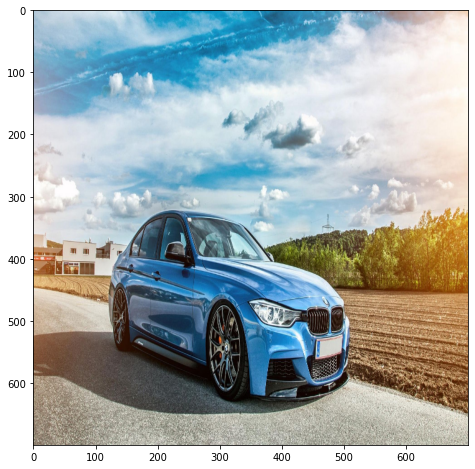

In [98]:
plt.figure(figsize = (10,8)) #matlplot trits image as rgb image not bgr image
plt.imshow(rgb) 
cv.waitKey(0)  

bgr to rgb

In [99]:
rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
dis(rgb,"rgb") 

                                                                  COLOR CHANNELS

dark = less pixel                                                                 
light = more pixel

In [4]:
b,g,r = cv.split(img)
cv.imshow("blue", b)
cv.imshow("green", g)
cv.imshow("red",r)
cv.waitKey(0)

-1

In [5]:
print(img.shape,b.shape,g.shape,r.shape)

(700, 700, 3) (700, 700) (700, 700) (700, 700)


In [6]:
blank = np.zeros(img.shape[:2], dtype='uint8') 

In [7]:
blue = cv.merge([b,blank,blank])
green = cv.merge([blank,g,blank])
red = cv.merge([blank,blank,r])

cv.imshow('blue',blue)
cv.imshow('green',green)
cv.imshow('red',red)
 
cv.waitKey(0) 

-1

                                                                 BLURRING TECHNIQUE

averaging

In [6]:
average = cv.blur(img, (3,3)) # img , kernel size
dis(average,"average blur")

guassian

In [11]:
guass = cv.GaussianBlur(img,(7,7),0) 
dis(guass,"guassian blur") 

median 

In [13]:
med = cv.medianBlur(img,3)
dis(med,"median blur") 

bilateral

In [19]:
bil = cv.bilateralFilter(img,50,150,150)#2 kernel size is diameter
dis(bil) 

                                                                  BITWISE OPERATION

In [22]:
blank = np.zeros((500,500),dtype='uint8')

In [38]:
rectangle = cv.rectangle(blank.copy(), (50,50), (450,450), (255,0,0), -1)  

In [49]:
circle = cv.circle(blank.copy(), (250,250), 250, (255), -1)

In [50]:
cv.imshow('rectangle',rectangle)
cv.imshow('circle',circle)
cv.waitKey(0) 

-1

In [53]:
band = cv.bitwise_and(rectangle,circle)
dis(band) 

In [54]:
bor = cv.bitwise_or(rectangle,circle)
dis(bor) 

In [55]:
bxor = cv.bitwise_xor(rectangle,circle)
dis(bxor) 

In [57]:
bnotc = cv.bitwise_not(circle)
dis(bnotc) 

In [59]:
bnotr = cv.bitwise_not(rectangle)
dis(bnotr) 

                                                                         MASKING

In [76]:
blank = np.zeros(img.shape[:2], dtype='uint8')
cir = cv.circle(blank, (img.shape[1]//2-50, img.shape[0]//2+100), 100, 255, -1)
mk = cv.bitwise_and(img,img,mask=cir)
dis(mk) #you can make rectangle and do some more prectice

                                                              COMPUTING HISTOGRAMS

to visualize pixel intensity 

gray scale histo

In [99]:
img =cv.imread('photos/Black Bmw with fighter craft.jpg')
img = cv.resize(img,(500,500))


In [103]:
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
dis(gray,"gray") 

In [105]:
blank = np.zeros((500,500), dtype='uint8')

In [113]:
rectangle = cv.rectangle(blank, (50,50), (450,450), (250), -1) 

In [133]:
mask = cv.bitwise_and(img,img,mask=rectangle) 

In [125]:
dis(mask)

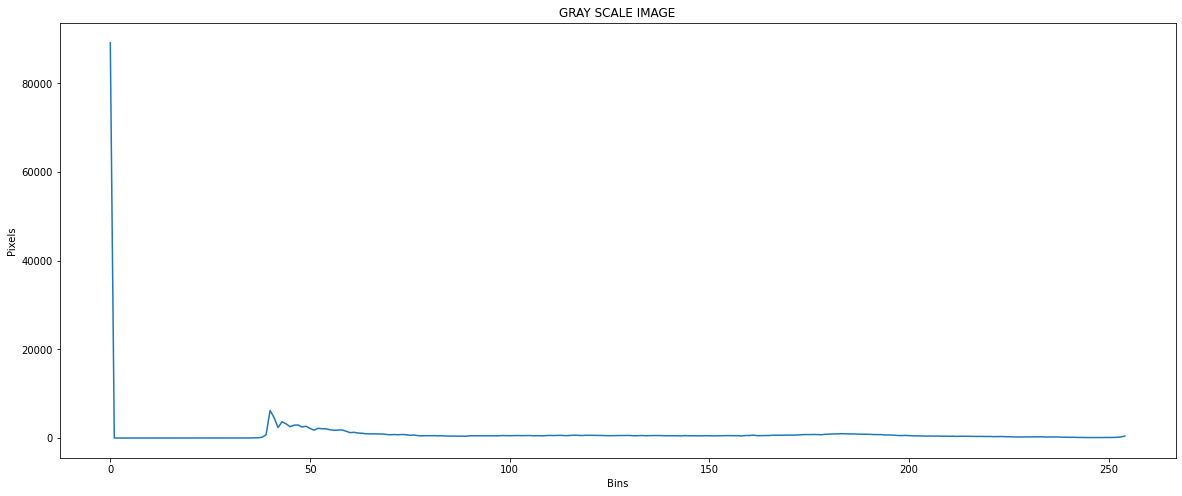

In [126]:
ghist = cv.calcHist([mask], [0], None, [255], [0,255])
plt.figure() 
plt.title('GRAY SCALE IMAGE')
plt.xlabel('Bins') 
plt.ylabel('Pixels')
plt.plot(ghist)  

color scale

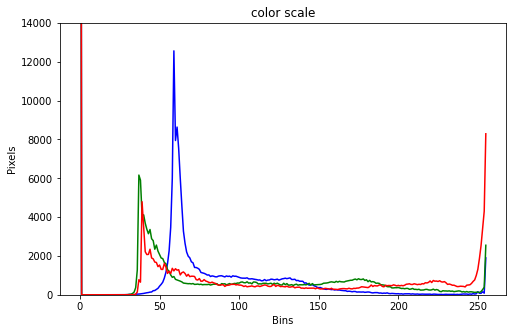

In [150]:
color = ('b','g','r')
plt.figure(figsize=(8,5)) 
plt.title("color scale") 
plt.xlabel('Bins') 
plt.ylabel('Pixels')
for i,col in enumerate(color):
    hist = cv.calcHist([mask], [i], None, [256], [0,256])
    plt.plot(hist, color= col)  
    plt.ylim([0,14000])


                                                                       THRESHOLDING

Simple Thresholding - here we need to find value 

In [2]:
img = cv.imread('photos/lion.jpg') 
img = cv.resize(img, (500,500)) 

In [4]:
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY) 
cv.imshow("gray",gray)
cv.waitKey(0) 

-1

In [13]:
threshold, thresh = cv.threshold(gray, 100, 255, cv.THRESH_BINARY)
dis(thresh,"threshold image")   

In [14]:
threshold, thresh_inv = cv.threshold(gray, 100, 255, cv.THRESH_BINARY_INV)
dis(thresh_inv,"inverse threshold image")   

Adaptive Thresholding - computer finds optimal value

In [19]:
ad_th = cv.adaptiveThreshold(gray, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 11, 9)
dis(ad_th)                                             #   mean you can try over gaussian

                                                          GRADIENTS &  EDGE DETECTION

Laplacian

In [23]:
lap = cv.Laplacian(gray, cv.CV_64F)
lap = np.uint8(np.absolute(lap)) 
dis(lap) 

Soble

In [29]:
sobelx = cv.Sobel(gray, cv.CV_64F, 1, 0)
sobely = cv.Sobel(gray, cv.CV_64F, 0, 1) 
cv.imshow('sobelx',sobelx)
cv.imshow('sobely',sobely)
cv.waitKey(0) 

-1

In [30]:
combo = cv.bitwise_or(sobelx,sobely) 
dis(combo)

In [31]:
canny = cv.Canny(gray, 150, 175)  

In [33]:
cv.imshow('canny',canny)
cv.imshow('combine_sable', combo)
cv.imshow('laplacian', lap) 
cv.waitKey(0) 

-1